In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, classification_report,accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [2]:
df_jointed = pd.read_csv('Jointed_ficher_v2.csv')

count    1.110137e+06
mean     3.049208e+00
std      1.869882e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.297000e+03
Name: WeatherDelay, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023270010048>]],
      dtype=object)

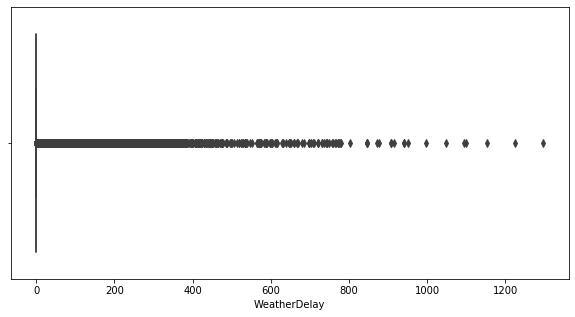

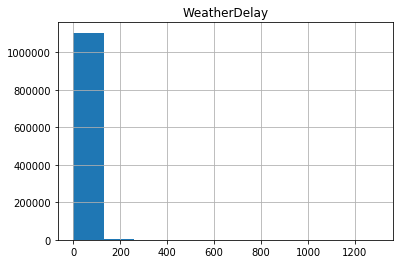

In [3]:
print(df_jointed['WeatherDelay'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='WeatherDelay', data=df_jointed)
df_jointed.hist('WeatherDelay')

In [4]:
vu=df_jointed[(df_jointed['WeatherDelay']<30)]

In [5]:
vu.shape

(1076275, 33)

In [6]:
df_jointed.shape

(1110137, 33)

In [7]:
884882/1110137

0.7970926110921445

In [8]:
(df_jointed.shape[0])-(vu.shape[0])

33862

In [9]:
df_jointed.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,N464WN,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,N750EV,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,80209E,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,N763SW,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,N780NC,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0


In [10]:
df_jointed.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'City', 'Hour', 'Start_Date', 'Temperature', 'Dew Point',
       'Relative Humidity', 'Wind Speed', 'Precipitation',
       'Precipitation Cover', 'Visibility'],
      dtype='object')

In [11]:
df_jointed['Origin'].value_counts()

ATL    104783
ORD    104155
DFW     70405
DEN     55264
EWR     45443
DTW     41082
IAH     40142
LAX     39778
PHX     36034
JFK     35102
LAS     34416
LGA     31884
MSP     30009
CLT     29646
BOS     27944
MCO     26488
PHL     25116
SLC     21801
CVG     21112
SEA     21093
IAD     20242
MIA     18784
MDW     18593
DCA     16926
SAN     16501
MEM     15969
FLL     15540
TPA     14816
CLE     14039
RDU     12974
HOU     12091
BNA     12024
MCI     11726
DAL     11256
MKE      9894
PIT      9593
OAK      9411
AUS      8993
PDX      8763
IND      8548
PWM      1732
SFO        25
Name: Origin, dtype: int64

In [12]:
df_jointed['Dest'].value_counts()

ORD    50788
ATL    44357
EWR    32405
LAX    32131
DFW    31393
LGA    31316
DEN    30099
SFO    27712
LAS    25302
PHX    23388
BOS    23186
JFK    22714
MCO    21444
IAH    21399
PHL    20311
CLT    18734
MSP    17964
DTW    17658
SEA    17090
DCA    15179
MIA    14631
SAN    14347
BWI    13703
FLL    13476
SLC    12977
TPA    12921
IAD    12773
RDU    12550
MCI    11484
STL    11369
       ...  
RKS      116
MOD       88
OTH       69
BTM       67
MKG       67
IYK       65
YKM       64
IPL       63
CDC       63
ACV       59
ALO       52
LWS       51
CMX       50
RFD       50
BPT       47
PLN       41
RHI       34
LMT       32
TEX       28
LWB       27
ACY       25
HTS       23
SIT       22
SUX       21
ITH       20
WYS       20
BLI       12
INL       10
BJI        4
PIR        1
Name: Dest, Length: 282, dtype: int64

In [13]:
dep=df_jointed['Origin']
dest=df_jointed['Dest']
depart=pd.DataFrame(dep)
depart.columns=['aeroport']
arrivee=pd.DataFrame(dest)
arrivee.columns=['aeroport']
combinaison=pd.concat([depart, arrivee], join = 'inner')

print("Il y'a",len(combinaison['aeroport'].value_counts().values),"aéroports (departs et arrivées confondus) :")
print(combinaison['aeroport'].value_counts())
combinaison

Il y'a 282 aéroports (departs et arrivées confondus) :
ORD    154943
ATL    149140
DFW    101798
DEN     85363
EWR     77848
LAX     71909
LGA     63200
IAH     61541
LAS     59718
PHX     59422
DTW     58740
JFK     57816
BOS     51130
CLT     48380
MSP     47973
MCO     47932
PHL     45427
SEA     38183
SLC     34778
MIA     33415
IAD     33015
DCA     32105
CVG     32045
SAN     30848
FLL     29016
MDW     28952
TPA     27737
SFO     27737
RDU     25524
MEM     25269
        ...  
RKS       116
MOD        88
OTH        69
BTM        67
MKG        67
IYK        65
YKM        64
CDC        63
IPL        63
ACV        59
ALO        52
LWS        51
CMX        50
RFD        50
BPT        47
PLN        41
RHI        34
LMT        32
TEX        28
LWB        27
ACY        25
HTS        23
SIT        22
SUX        21
ITH        20
WYS        20
BLI        12
INL        10
BJI         4
PIR         1
Name: aeroport, Length: 282, dtype: int64


,aeroport
0,IND
1,IND
2,IND
3,IND
4,IND
5,IND
6,IND
7,IND
8,IND
9,IND


In [14]:
combinaison['aeroport'].value_counts()[:10].sum()

884882

# Data Prepocessing

In [15]:
def fill(x):
    if x<30:
        return 0
    else: 
        return 1

In [16]:
meteo=df_jointed.loc[:,['Month','TailNum','Origin','Dest','Distance','Temperature','Dew Point','Relative Humidity','Wind Speed','Visibility','WeatherDelay']]

In [17]:
meteo['WeatherDelay_30']= meteo['WeatherDelay'].apply(lambda x : fill(x))

In [18]:
meteo.head()

,Month,TailNum,Origin,Dest,Distance,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay,WeatherDelay_30
0,1,N464WN,IND,BWI,515,16.6,8.8,70.99,8.1,10.0,0.0,0
1,1,N750EV,IND,ATL,432,16.6,8.8,70.99,8.1,10.0,0.0,0
2,1,80209E,IND,DCA,499,16.6,8.8,70.99,8.1,10.0,0.0,0
3,1,N763SW,IND,LAS,1591,19.1,10.1,67.40,7.7,10.0,0.0,0
4,1,N780NC,IND,MSP,503,19.1,10.1,67.40,7.7,10.0,0.0,0


In [19]:
'''meteo= meteo[(meteo['Origin']=='ATL')|(meteo['Origin']=='ORD')|(meteo['Origin']=='EWR')|(meteo['Origin']=='DFW')|
            (meteo['Origin']=='DEN')| (meteo['Dest']=='ATL')|(meteo['Dest']=='ORD')|
            (meteo['Dest']=='EWR')|(meteo['Dest']=='DFW')|(meteo['Dest']=='DEN')]'''

#|(meteo['Origin']=='LAX')|(meteo['Origin']=='LGA')|(meteo['Origin']=='IAH')|(meteo['Origin']=='LAS')|(meteo['Origin']=='PHX')
#|(meteo['Dest']=='LAX')|(meteo['Dest']=='LGA')|(meteo['Dest']=='IAH')|(meteo['Dest']=='LAS')|(meteo['Dest']=='PHX')

"meteo= meteo[(meteo['Origin']=='ATL')|(meteo['Origin']=='ORD')|(meteo['Origin']=='EWR')|(meteo['Origin']=='DFW')|\n            (meteo['Origin']=='DEN')| (meteo['Dest']=='ATL')|(meteo['Dest']=='ORD')|\n            (meteo['Dest']=='EWR')|(meteo['Dest']=='DFW')|(meteo['Dest']=='DEN')]"

In [20]:
meteo= meteo[(meteo['Origin']=='ATL')|(meteo['Origin']=='ORD')|(meteo['Origin']=='EWR')|(meteo['Origin']=='DFW')|(meteo['Origin']=='DEN')]

In [21]:
meteo=meteo[(meteo['Dest']=='ATL')|(meteo['Dest']=='ORD')|(meteo['Dest']=='EWR')|(meteo['Dest']=='DFW')|(meteo['Dest']=='DEN')]

In [22]:
meteo.head()

,Month,TailNum,Origin,Dest,Distance,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay,WeatherDelay_30
120980,1,N539UA,ORD,DEN,888,7.1,-0.1,71.61,12.8,9.0,0.0,0
120991,1,N403AA,ORD,DEN,888,7.1,-0.1,71.61,12.8,9.0,0.0,0
121009,1,N203UA,ORD,EWR,719,5.5,-1.0,73.76,7.7,10.0,0.0,0
121017,1,N406AA,ORD,DEN,888,5.5,-1.0,73.76,7.7,10.0,0.0,0
121045,1,N584UA,ORD,DEN,888,17.0,5.1,58.97,14.8,10.0,0.0,0


In [23]:
meteo.shape

(39802, 12)

In [24]:
vu1=meteo[(meteo['WeatherDelay']<30)]

In [25]:
vu1.shape

(38906, 12)

In [26]:
meteo = pd.get_dummies(meteo, columns=['Origin', 'Dest'])

In [27]:
meteo.head()

,Month,TailNum,Distance,Temperature,Dew Point,Relative Humidity,Wind Speed,Visibility,WeatherDelay,WeatherDelay_30,Origin_ATL,Origin_DEN,Origin_DFW,Origin_EWR,Origin_ORD,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_ORD
120980,1,N539UA,888,7.1,-0.1,71.61,12.8,9.0,0.0,0,0,0,0,0,1,0,1,0,0,0
120991,1,N403AA,888,7.1,-0.1,71.61,12.8,9.0,0.0,0,0,0,0,0,1,0,1,0,0,0
121009,1,N203UA,719,5.5,-1.0,73.76,7.7,10.0,0.0,0,0,0,0,0,1,0,0,0,1,0
121017,1,N406AA,888,5.5,-1.0,73.76,7.7,10.0,0.0,0,0,0,0,0,1,0,1,0,0,0
121045,1,N584UA,888,17.0,5.1,58.97,14.8,10.0,0.0,0,0,0,0,0,1,0,1,0,0,0


In [28]:
meteo.shape

(39802, 20)

In [29]:
voir=meteo.copy()

In [30]:
X=meteo.select_dtypes(include=[object])

In [31]:
le = preprocessing.LabelEncoder()

In [32]:
X=X.apply(le.fit_transform)

In [33]:
X.columns=['TailNumEncod']

In [34]:
X.head()

,TailNumEncod
120980,1111
120991,739
121009,297
121017,745
121045,1206


In [35]:
meteo1=pd.concat([meteo, X], axis = 1) 

In [36]:
meteo1=meteo1.drop(['TailNum', 'Distance', 'WeatherDelay'], axis=1)

In [37]:
meteo1.head()

,Month,Temperature,Relative Humidity,Wind Speed,Visibility,WeatherDelay_30,Origin_ATL,Origin_DEN,Origin_DFW,Origin_EWR,Origin_ORD,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_ORD,TailNumEncod
120980,1,7.1,71.61,12.8,9.0,0,0,0,0,0,1,0,1,0,0,0,1111
120991,1,7.1,71.61,12.8,9.0,0,0,0,0,0,1,0,1,0,0,0,739
121009,1,5.5,73.76,7.7,10.0,0,0,0,0,0,1,0,0,0,1,0,297
121017,1,5.5,73.76,7.7,10.0,0,0,0,0,0,1,0,1,0,0,0,745
121045,1,17.0,58.97,14.8,10.0,0,0,0,0,0,1,0,1,0,0,0,1206


In [38]:
meteo1.shape

(39802, 17)

In [39]:
#Déplacer la colonne 'WeatherDelay_30' à la fin dataframe
df_temp = meteo1.pop('WeatherDelay_30')
meteo1['WeatherDelay_30']=df_temp

In [40]:
meteo1.head()

,Month,Temperature,Relative Humidity,Wind Speed,Visibility,Origin_ATL,Origin_DEN,Origin_DFW,Origin_EWR,Origin_ORD,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_ORD,TailNumEncod,WeatherDelay_30
120980,1,7.1,71.61,12.8,9.0,0,0,0,0,1,0,1,0,0,0,1111,0
120991,1,7.1,71.61,12.8,9.0,0,0,0,0,1,0,1,0,0,0,739,0
121009,1,5.5,73.76,7.7,10.0,0,0,0,0,1,0,0,0,1,0,297,0
121017,1,5.5,73.76,7.7,10.0,0,0,0,0,1,0,1,0,0,0,745,0
121045,1,17.0,58.97,14.8,10.0,0,0,0,0,1,0,1,0,0,0,1206,0


In [41]:
meteo1.shape

(39802, 17)

In [42]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

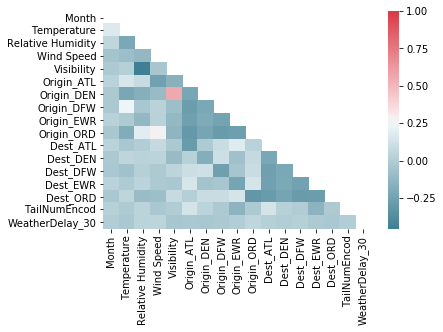

In [43]:
plot_corr(meteo1.corr())

# Prediction avec RandomForest +SMOTE

In [249]:
X=meteo1.drop('WeatherDelay_30', axis=1)
y=meteo1['WeatherDelay_30']

In [250]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 38906, 1: 896})


In [251]:
sm = SMOTE(sampling_strategy=0.3,random_state=42)

In [252]:
X_res, y_res = sm.fit_resample(X, y)

In [253]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 38906, 1: 11671})


In [254]:
x_train, x_val, y_train, y_val = train_test_split(X_res,y_res, test_size = 0.2,random_state=12)

In [255]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [258]:
print("Validation Results")
print(clf_rf.score(x_val, y_val))
predicted=clf_rf.predict(x_val)

Validation Results
0.9755832344800316


In [259]:
clf_rf.feature_importances_

array([0.03512666, 0.08069582, 0.06194113, 0.06805929, 0.10874321,
       0.04020052, 0.03707688, 0.03591903, 0.04534978, 0.0481984 ,
       0.106574  , 0.0584299 , 0.06080952, 0.05071233, 0.05606406,
       0.10609948])

In [260]:
clf_rf.score(x_val, y_val)

0.9755832344800316

In [261]:
probabilities = clf_rf.predict_proba(x_val)

In [263]:
probabilities

array([[0.  , 1.  ],
       [0.88, 0.12],
       [0.04, 0.96],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [264]:
roc_auc_score(y_val, probabilities[:, 1])

0.9892820059689866

Text(0, 0.5, 'True Positive Rate')

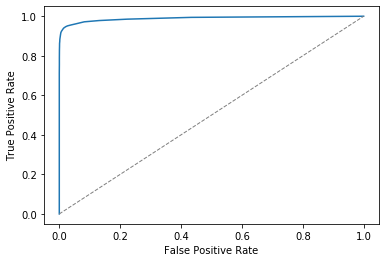

In [265]:
fpr, tpr, _ = roc_curve(y_val, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [266]:
confusion_matrix(y_val, predicted)

array([[7782,   31],
       [ 216, 2087]], dtype=int64)

In [267]:
precision_score(y_val, predicted)

0.9853635505193579

In [268]:
recall_score(y_val, predicted)

0.9062092922275293

In [269]:
print(classification_report(y_val,predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7813
           1       0.99      0.91      0.94      2303

    accuracy                           0.98     10116
   macro avg       0.98      0.95      0.96     10116
weighted avg       0.98      0.98      0.98     10116



# Up-sampling/ down-sampling

In [270]:
# Separate majority and minority classes
df_majority = meteo1[meteo1.WeatherDelay_30==0]
df_minority = meteo1[meteo1.WeatherDelay_30==1]

In [288]:
print(df_majority.shape)
print(df_minority.shape)

(38906, 17)
(896, 17)


In [272]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17920,    # to match majority class
                                 random_state=123) # reproducible results

In [289]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3890,     # to match minority class
                                 random_state=123) # reproducible results

In [290]:
# Combine majority class with upsampled minority class
df_mediumsampled = pd.concat([df_majority_downsampled, df_minority])

In [291]:
# Display new class counts
df_mediumsampled['WeatherDelay_30'].value_counts()

0    3890
1     896
Name: WeatherDelay_30, dtype: int64

# New RandomForest

In [292]:
X_train, X_test, y_train, y_test = train_test_split(df_mediumsampled.drop('WeatherDelay_30', axis=1),df_mediumsampled['WeatherDelay_30'], test_size = 0.3,random_state=12)

In [293]:
model = RandomForestClassifier(n_estimators=10, random_state=12)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [294]:
new_predicted = model.predict(X_test)
model.score(X_test, y_test)

0.8259052924791086

In [295]:
new_probabilities = model.predict_proba(X_test)

In [296]:
roc_auc_score(y_test, new_probabilities[:, 1])

0.7253835930892836

Text(0, 0.5, 'True Positive Rate')

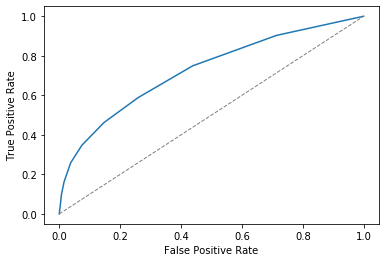

In [297]:
fpr, tpr, _ = roc_curve(y_test, new_probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [298]:
confusion_matrix(y_test, new_predicted)

array([[1114,   43],
       [ 207,   72]], dtype=int64)

In [300]:
recall_score(y_test, new_predicted)

0.25806451612903225

In [301]:
precision_score(y_test, new_predicted)

0.6260869565217392

In [302]:
print(classification_report(y_test,new_predicted))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1157
           1       0.63      0.26      0.37       279

    accuracy                           0.83      1436
   macro avg       0.73      0.61      0.63      1436
weighted avg       0.80      0.83      0.80      1436



In [285]:
model.feature_importances_

array([0.08796111, 0.19109305, 0.16806339, 0.15948109, 0.08340505,
       0.00626612, 0.00758974, 0.00744426, 0.0121237 , 0.02310999,
       0.01502527, 0.01028077, 0.01379962, 0.01506705, 0.00906237,
       0.19022744])

In [286]:
feature_imp = pd.Series(model.feature_importances_,index=meteo1.drop('WeatherDelay_30', axis=1).columns).sort_values(ascending=False)
feature_imp

Temperature          0.191093
TailNumEncod         0.190227
Relative Humidity    0.168063
Wind Speed           0.159481
Month                0.087961
Visibility           0.083405
Origin_ORD           0.023110
Dest_EWR             0.015067
Dest_ATL             0.015025
Dest_DFW             0.013800
Origin_EWR           0.012124
Dest_DEN             0.010281
Dest_ORD             0.009062
Origin_DEN           0.007590
Origin_DFW           0.007444
Origin_ATL           0.006266
dtype: float64

No handles with labels found to put in legend.


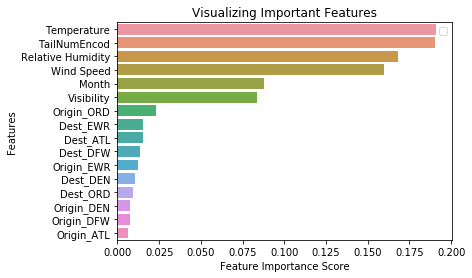

In [287]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [88]:
2916/(2916+103)

0.96588274263001